In [42]:
import pandas as pd
import numpy as np
df_bosch = pd.read_csv('ToolDataSheetVsNQuebras.csv', sep=";")
df_bosch.head()

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.0,3.0,38.0,2.5,Desconhecido,0.0,0
1,4700101394,26,001-BA,ALLIANCE CNC,10.7,12.0,92.0,50.0,K30/40-UF,30.0,1
2,4700101395,28,001-BA,ALLIANCE CNC,9.7,10.0,92.0,50.0,K30/40-UF,30.0,1
3,4700500778,5,005-BG,ALLIANCE CNC,4.0,6.0,58.0,17.0,K30/40-UF,27.0,0
4,4700700155,9,007-BK,BLICKLE WERKZEUGE GMBH & CO KG,6.0,6.0,66.0,25.0,K30/40-UF,15.0,1


In [56]:
df_bosch.nQuebras.unique()

array([  5,  26,  28,   9,   4,  21,  92, 142, 253,  18, 124,  40,  25,
        10, 106,   8,  23,  16,  68,   2,  34,   6,  69,   1,   3,  56,
        83,  14, 121,  22, 173,  60,  51,  20,  98, 189,  27,  54,  52,
        15,  48,  42,   7,  17, 139,  43,  47,  32,  29,  55,  39,  44,
        67,  30,  35,  11,  94,  70,  87,  59,  12,  13,  37,  31, 267,
        38, 167, 108, 457, 146,  71, 394, 277, 574, 144, 256, 315,  91,
        41, 419, 497, 161, 177, 202], dtype=int64)

In [43]:
df_bosch.shape

(220, 11)

In [51]:
df_tratado = pd.concat([df_bosch, pd.get_dummies(df_bosch.Supplier, prefix='Supplier_')], axis=1)
df_tratado.drop('Supplier', axis=1, inplace=True)
df_tratado = pd.concat([df_tratado, pd.get_dummies(df_tratado.Family, prefix='family')], axis=1)
df_tratado.drop('Family', axis=1, inplace=True)
df_tratado = pd.concat([df_tratado, pd.get_dummies(df_tratado.MaterialClass)], axis=1)
df_tratado.drop('MaterialClass', axis=1, inplace=True)
nQuebras15 = 15
nQuebras45 = 45
df_tratado['label1'] = np.where(df_tratado['nQuebras'] <= nQuebras45, 1, 0 )
df_tratado['label2'] = df_tratado['label1']
df_tratado.loc[df_tratado['nQuebras'] <= nQuebras15, 'label2'] = 2
df_tratado.drop('label1', inplace=True, axis=1)
df_tratado.rename(columns={'label2':'faixa_de_quebras'}, inplace=True)
df_tratado.columns

Index(['PartNumber', 'nQuebras', 'LargerDiameter', 'StemDiameter',
       'TotalLength', 'ChannelLength', 'PropellerAngle', 'Refrigeration',
       'Supplier__3M TECHNICAL CERAMICS ZWEIGNIEDERLA',
       'Supplier__ALLIANCE CNC', 'Supplier__BLICKLE WERKZEUGE GMBH & CO KG',
       'Supplier__BOTEK-PRAEZISIONS-BOHRTECHNIK',
       'Supplier__FERRAMENTAS GERAIS COMERCIO E',
       'Supplier__FERRAMENTAS NIPOTEC IND.E', 'Supplier__FORM TOOL TECHNOLOGY',
       'Supplier__FORM TOOL TECHNOLOGY, INC.',
       'Supplier__FULLERTON TOOL COMPANY INC.',
       'Supplier__GUHRING BRASIL FERR.LTDA', 'Supplier__GUHRING OHG',
       'Supplier__HARTMETALLWERKZEUGFABRIK ANDREAS',
       'Supplier__ISCAR DO BRASIL COMERCIAL LTDA',
       'Supplier__KOMET GROUP GMBH',
       'Supplier__LMT TOOLS BRASIL FERRAMENTAS LTDA.',
       'Supplier__MIKRON CORP. MONROE', 'Supplier__NÃO ATRIBUÍDO',
       'Supplier__OSBORN INTERNATIONAL GMBH ZN DER JA',
       'Supplier__OSTREM TOOL COMPANY',
       'Supplier__ROBE

In [52]:
def scale(df):
    return (df - df.min())/(df.max()-df.min())

for col in df_tratado.columns:
    if col == 'LargerDiameter':
        df_tratado[col] = scale(df_tratado[col])
    if col == 'StemDiameter':
        df_tratado[col] = scale(df_tratado[col])
    if col == 'TotalLength':
        df_tratado[col] = scale(df_tratado[col])
    if col == 'ChannelLength':
        df_tratado[col] = scale(df_tratado[col])
    if col == 'PropellerAngle':
        df_tratado[col] = scale(df_tratado[col])
    if col == 'LargerDiameter':
        df_tratado[col] = scale(df_tratado[col])

In [58]:
df_tratado.head()

,PartNumber,nQuebras,LargerDiameter,StemDiameter,TotalLength,ChannelLength,PropellerAngle,Refrigeration,Supplier__3M TECHNICAL CERAMICS ZWEIGNIEDERLA,Supplier__ALLIANCE CNC,...,K30-40/UF,K30-40UF,K30/40,K30/40-UF,K30/K40-UF,Na,S20,S20/B,k30/40-UF,faixa_de_quebras
0,4721700050,5,0.014254,0.026549,0.017143,0.010791,0.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1,4700101394,26,0.068860,0.424779,0.325714,0.352518,0.0030,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,4700101395,28,0.061769,0.336283,0.325714,0.352518,0.0030,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,4700500778,5,0.021346,0.159292,0.131429,0.115108,0.0027,0,0,1,...,0,0,0,1,0,0,0,0,0,2
4,4700700155,9,0.035529,0.159292,0.177143,0.172662,0.0015,1,0,0,...,0,0,0,1,0,0,0,0,0,2


In [77]:
df_tratado.to_csv('df_tratado_bosch.csv')

In [59]:
from sklearn.model_selection import train_test_split
X = df_tratado.drop(['PartNumber', 'nQuebras', 'faixa_de_quebras'], axis=1)
y = df_tratado.faixa_de_quebras

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
taxa_de_erro = []
#encontrando k
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicao = knn.predict(X_test)
    taxa_de_erro.append(np.mean(predicao != y_test))
print(taxa_de_erro)

[0.589041095890411, 0.5753424657534246, 0.5342465753424658, 0.5616438356164384, 0.5068493150684932, 0.4794520547945205, 0.4931506849315068, 0.4657534246575342, 0.4794520547945205, 0.4657534246575342, 0.4657534246575342, 0.4931506849315068, 0.4657534246575342, 0.5205479452054794, 0.5616438356164384, 0.5616438356164384, 0.6164383561643836, 0.6164383561643836, 0.589041095890411, 0.5753424657534246, 0.5753424657534246, 0.6164383561643836, 0.6027397260273972, 0.589041095890411, 0.6027397260273972, 0.5753424657534246, 0.589041095890411, 0.5753424657534246, 0.5616438356164384]


Text(0, 0.5, 'Error Rate')

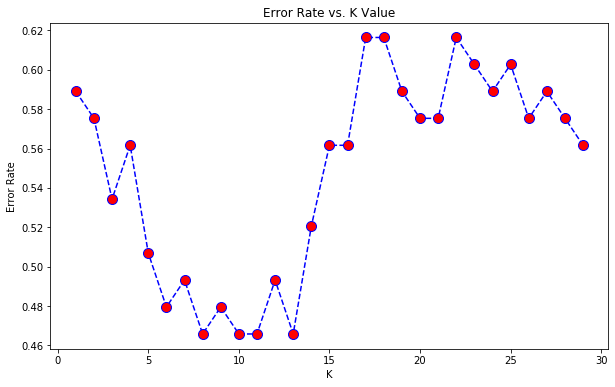

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,30),taxa_de_erro,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_bosch = KNeighborsClassifier(n_neighbors=7)
knn_bosch.fit(X_train, y_train)
predictions = knn_bosch.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.50      0.44        18
           1       0.44      0.30      0.36        23
           2       0.62      0.66      0.64        32

    accuracy                           0.51        73
   macro avg       0.48      0.49      0.48        73
weighted avg       0.51      0.51      0.50        73

